In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import BaggingClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification

In [66]:
x, y = make_classification(
    n_samples=100,       # Fixed number of samples
    n_features=2,        # Fixed number of features
    n_classes=3,         # Number of classes
    n_informative=2,     # All features are informative
    n_redundant=0,       # No redundant features
    n_clusters_per_class=1,  # Adjusted to satisfy the condition
    flip_y=0.03,         # Add slight label noise
    class_sep=1.5,       # Enhance separability
    random_state=42
)

In [67]:
df = pd.DataFrame(x,columns=['feature1','feature2'])
df['target'] = y

In [68]:
df.head()

,feature1,feature2,target
0,-1.426315,-1.449498,2
1,-1.176214,1.912767,0
2,-1.810385,1.056563,0
3,-1.000234,-1.251066,2
4,-1.135331,-1.306694,0


In [69]:
df_train = df.iloc[:60,:].sample(20)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [70]:
x_test = df_val.drop(columns=['target'])
y_test = df_val['target']

Evaluate

In [71]:
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values,y.values,clf=clf)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test,y_pred))

Bagging

1st

In [72]:
df_bag = df_train.sample(15,replace=True)
x = df_bag.drop(columns=['target'])
y = df_bag['target']
df_bag

,feature1,feature2,target
13,-1.093403,1.822721,0
19,-1.955238,-1.726811,2
22,-1.880295,1.198409,0
31,-1.532714,-1.520408,2
17,-1.837457,1.085900,0
13,-1.093403,1.822721,0
51,3.345642,3.573179,1
13,-1.093403,1.822721,0
5,1.874869,1.899419,1
18,-1.236455,-1.358541,2


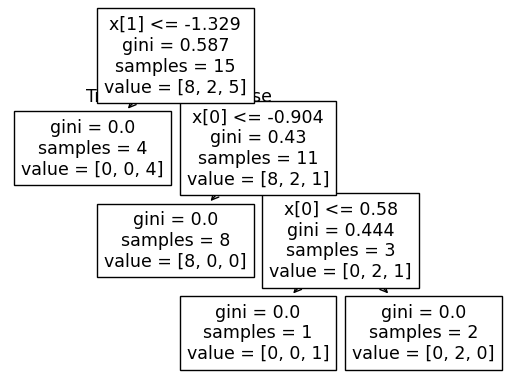

0.6


c:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


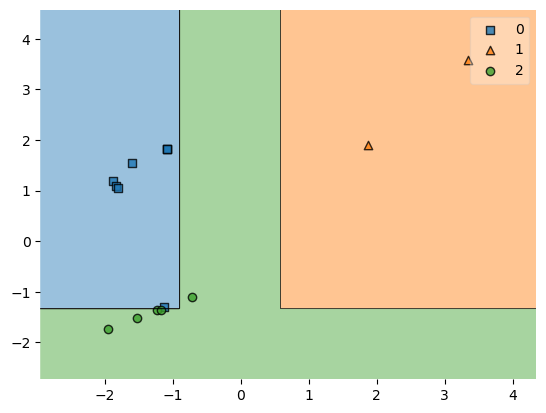

In [73]:
dt1 = DecisionTreeClassifier()
evaluate(dt1,x,y)

2nd

In [74]:
df_bag = df_train.sample(15,replace=True)
x = df_bag.drop(columns=['target'])
y = df_bag['target']
df_bag

,feature1,feature2,target
27,-0.715011,-1.107262,2
22,-1.880295,1.198409,0
17,-1.837457,1.085900,0
49,-1.599776,1.545783,0
23,-1.672789,1.133562,0
13,-1.093403,1.822721,0
19,-1.955238,-1.726811,2
11,-2.257614,0.491677,0
18,-1.236455,-1.358541,2
26,-1.987396,0.960109,0


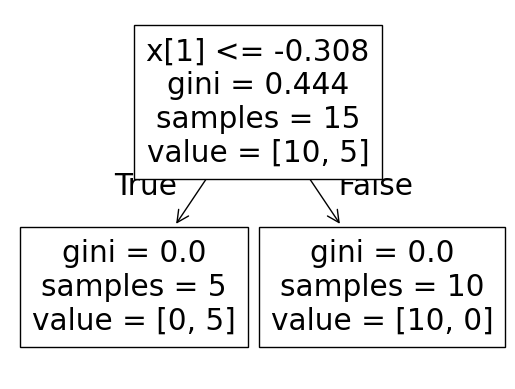

0.6


c:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


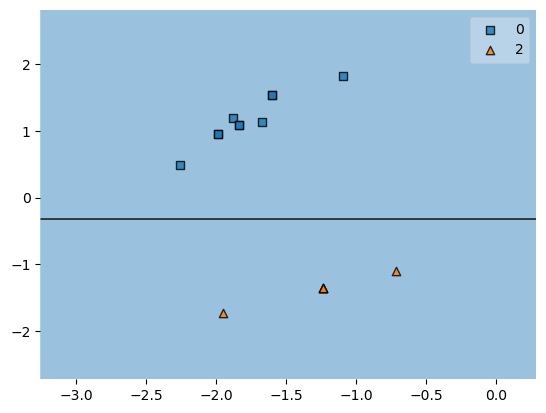

In [75]:
dt2 = DecisionTreeClassifier()
evaluate(dt2,x,y)

3rd

In [76]:
df_bag = df_train.sample(15,replace=True)
x = df_bag.drop(columns=['target'])
y = df_bag['target']
df_bag

,feature1,feature2,target
2,-1.810385,1.056563,0
5,1.874869,1.899419,1
13,-1.093403,1.822721,0
23,-1.672789,1.133562,0
31,-1.532714,-1.520408,2
19,-1.955238,-1.726811,2
18,-1.236455,-1.358541,2
23,-1.672789,1.133562,0
19,-1.955238,-1.726811,2
18,-1.236455,-1.358541,2


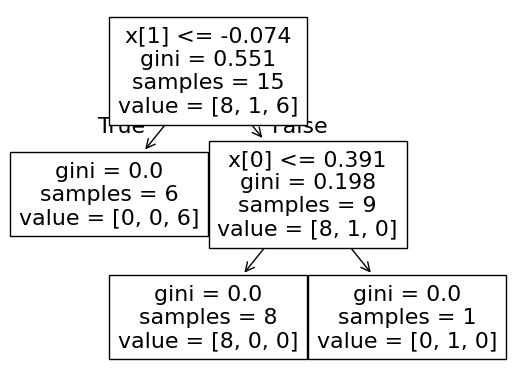

0.8


c:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


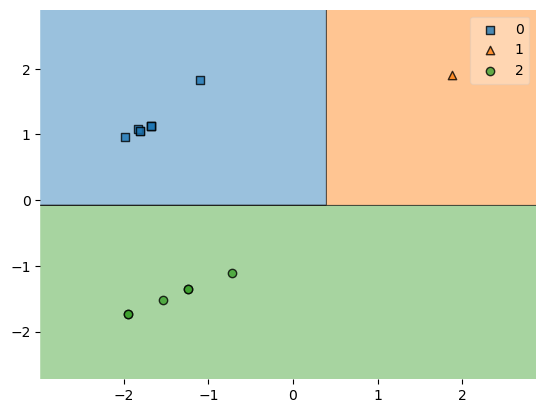

In [77]:
dt3 = DecisionTreeClassifier()
evaluate(dt3,x,y)